

# Lab10: Signals and Systems



In [2]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Exercise 1

Измените пример в `chap10.ipynb` и убедитесь, что дополнение нулями устраняет лишнюю ноту в начале фрагмента:

In [4]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

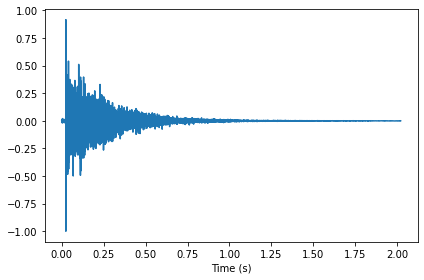

In [5]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [6]:
response.make_audio()

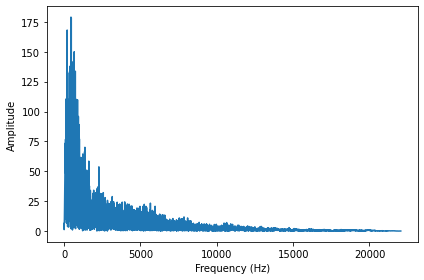

In [7]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [8]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

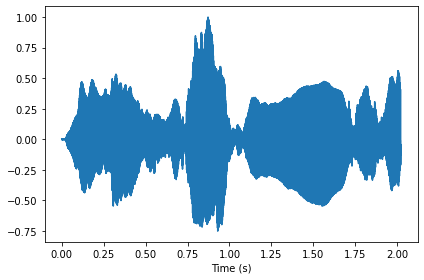

In [9]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [10]:
violin.make_audio()

In [11]:
spectrum = violin.make_spectrum()

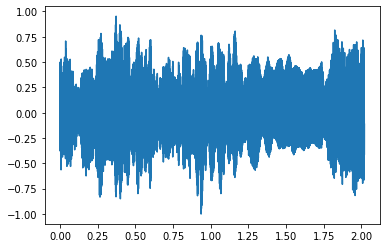

In [12]:
wave = (spectrum * transfer).make_wave()
wave.normalize()
wave.plot()

In [13]:
wave.make_audio()

Проблема с нотой решена.

## Exercise 2

Смоделируйте двумя способами звучание записи в том пространстве, где была измерена импульсная харпактеристика, как свёрткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соотвествующий импульсной характеристики.


Я взял себе такую характеристику: https://www.openair.hosted.york.ac.uk/?page_id=745, а потом ничего не заработало и на выходе был дикий шум, так что я взял характеристику из учебника:

In [97]:
if not os.path.exists('stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

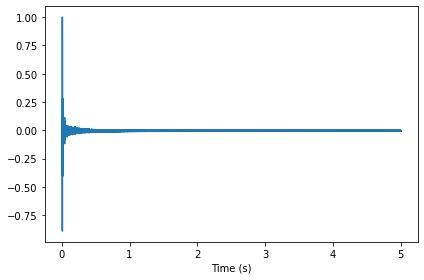

In [98]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')
decorate(xlabel='Time (s)')

In [99]:
response.framerate

44100

ДПФ импульсной характеристики:

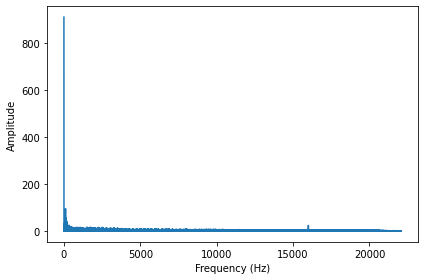

In [100]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь самое интересное, промоделируем запись в пространстве.

In [101]:
if not os.path.exists('164718__bradovic__piano.wav'):
    !wget https://github.com/wooftown/spbstu-telecom/raw/main/Content/164718__bradovic__piano.wav

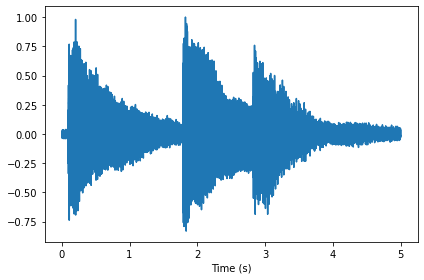

In [103]:
wave = read_wave('164718__bradovic__piano.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [104]:
wave.framerate

44100

In [112]:
wave.make_audio()

In [113]:
spectrum = wave.make_spectrum()

In [114]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [107]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [108]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

С использованием свёртки:

In [109]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()

Через умножение:

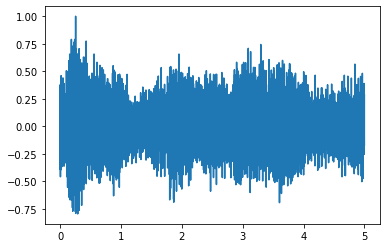

In [110]:
out_wave = (spectrum * transfer).make_wave()
out_wave.normalize()
out_wave.plot()

Результат:

In [111]:
out_wave.make_audio()